Importing the Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [24]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [25]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [26]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [27]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [28]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [29]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [30]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [38]:
gold_data=gold_data.drop('Date',axis='columns')

In [39]:
gold_data

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


Correlation:
1. Positive Correlation
2. Negative Correlation

In [40]:
correlation = gold_data.corr()

<Axes: >

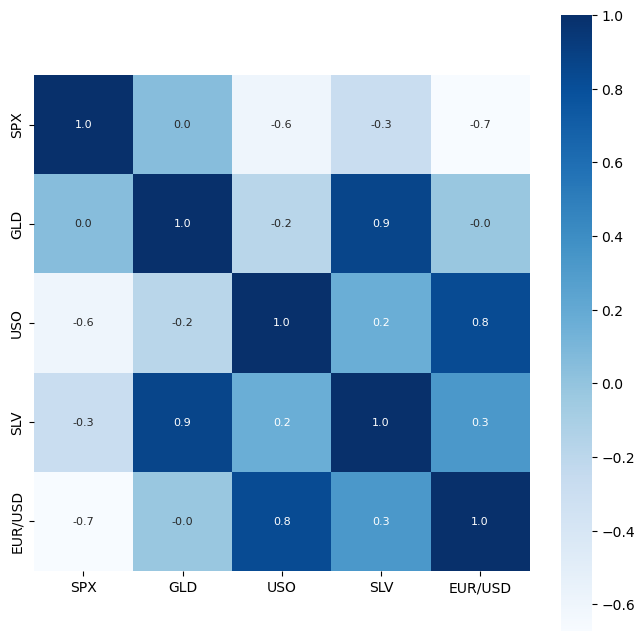

In [41]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [42]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\kargu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


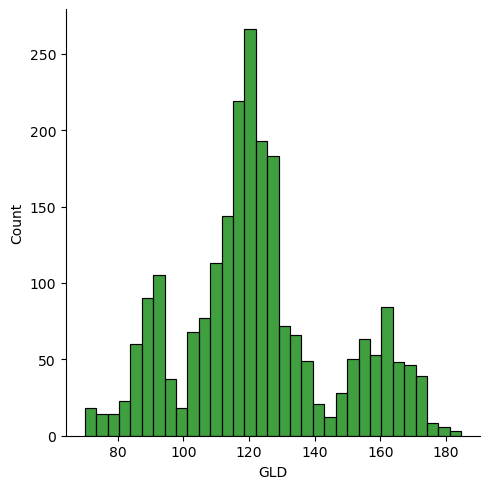

In [44]:
# checking the distribution of the GLD Price
sns.displot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [47]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [48]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [49]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [51]:
regressor = RandomForestRegressor(n_estimators=100)

In [52]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [53]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [54]:
print(test_data_prediction)

[168.51199937  81.60109992 116.10060024 127.74170106 120.62190131
 154.67129712 150.39129816 126.02230053 117.34339905 125.98940068
 116.61340106 171.67900068 141.50879829 167.94059915 115.1774999
 117.3955005  138.57700289 170.06520103 159.40000181 158.88899937
 155.09990043 125.2144005  175.86709942 156.87730304 125.27030047
  93.84419977  76.84739997 120.43550036 118.98709908 167.37589936
  88.18010027 125.22000026  91.26400061 117.73760012 121.05429926
 136.15240053 115.29710115 115.23950101 145.49349992 107.31440096
 104.51760239  87.33979833 126.67000091 117.94960005 151.14979904
 119.69490017 108.37779996 108.02989847  93.23790047 127.10029766
  74.5132006  113.7785993  121.23670044 111.33329919 118.79549902
 120.81519928 159.79520136 165.99030089 146.99749646  86.05529871
  94.48210022  86.79929898  90.69590007 118.78950082 126.32720067
 127.49959998 169.10630066 122.36629954 117.38299909  98.32519988
 168.05070031 142.84209863 132.13600284 121.19850229 121.60659929
 119.755100

In [55]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9898411811596117


Compare the Actual Values and Predicted Values in a Plot

In [56]:
Y_test = list(Y_test)

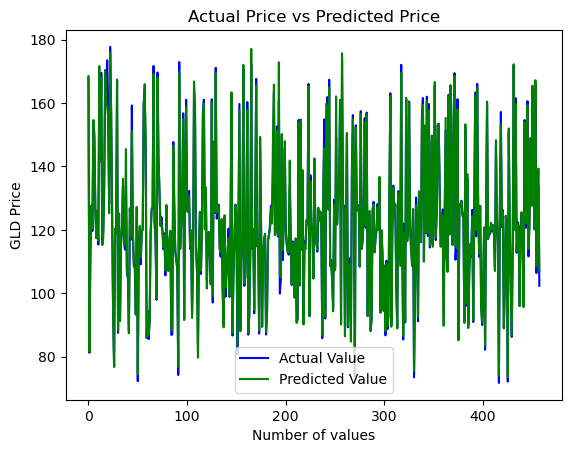

In [57]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [58]:
# Decision Tree

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [59]:
# predicting a new value
  
# test the output 
y_pred = regressor.predict(X_test)
y_pred

array([168.970001,  86.089996, 114.769997, 127.550003, 121.730003,
       155.669998, 149.149994, 126.809998, 117.389999, 125.620003,
       117.959999, 174.580002, 141.919998, 167.179993, 115.839996,
       116.730003, 134.100006, 168.5     , 159.570007, 138.220001,
       155.360001, 126.610001, 177.210007, 157.339996, 125.459999,
        93.720001,  73.080002, 122.290001, 119.220001, 167.990005,
        87.370003, 124.769997,  91.730003, 117.919998, 121.300003,
       135.410004, 114.57    , 115.800003, 134.119995, 105.720001,
       104.370003,  87.239998, 127.489998, 118.360001, 157.779999,
       119.959999, 108.419998, 107.839996,  93.459999, 128.539993,
        72.510002, 113.260002, 120.110001, 109.860001, 118.919998,
       120.730003, 161.320007, 161.520004, 146.869995,  85.199997,
        93.040001,  86.879997,  90.949997, 119.800003, 126.139999,
       127.400002, 173.490005, 122.970001, 116.209999,  97.550003,
       170.130005, 142.050003, 132.490005, 120.910004, 122.879

In [60]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)

print("R squared error : ", error_score)

R squared error :  0.9898411811596117


In [61]:
regressor.score(X_test, Y_test)

0.9854190298916252